# **Image classification from scratch**

**Description:** Training an image classifier from scratch on the Kaggle Cats vs Dogs dataset.

# **Dataset Link**

1. Credits to :- https://www.kaggle.com/datasets/salader/dogs-vs-cats?select=train

# **Setting up Data Directory**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogs-vs-cats")

print("Path to dataset files:", path)

100%|██████████| 1.06G/1.06G [00:11<00:00, 101MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1


# **Importing Packages**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.preprocessing.image import load_img
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array, load_img

**Training data**

In [ ]:
# Placeholder for the directory path
cat_directory_path = '/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/train/cats'
dog_directory_path = '/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/train/dogs'

In [ ]:
print("Number of cats training data:",len(os.listdir(cat_directory_path)))

Number of cats training data: 10000


In [ ]:
print("Number of dogs training data:",len(os.listdir(dog_directory_path)))

Number of dogs training data: 10000


**Testing data**

In [ ]:
# Placeholder for the directory path
cat_directory_path2 = '/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/test/cats'
dog_directory_path2 = '/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/test/dogs'

In [ ]:
print("Number of cats testing data:",len(os.listdir(cat_directory_path2)))

Number of cats testing data: 2500


In [ ]:
print("Number of dogs testing data:",len(os.listdir(dog_directory_path2)))

Number of dogs testing data: 2500


array([[[101, 120, 155],
        [102, 121, 156],
        [102, 121, 156],
        ...,
        [117, 136, 174],
        [114, 133, 171],
        [110, 129, 167]],

       [[102, 121, 156],
        [103, 122, 157],
        [104, 123, 158],
        ...,
        [119, 138, 176],
        [116, 135, 173],
        [112, 131, 169]],

       [[105, 124, 159],
        [106, 125, 160],
        [106, 125, 160],
        ...,
        [121, 140, 178],
        [118, 137, 175],
        [114, 133, 171]],

       ...,

       [[ 53,  72,  99],
        [ 52,  71,  98],
        [ 51,  70,  97],
        ...,
        [ 32,  41,  61],
        [ 34,  45,  65],
        [ 38,  49,  71]],

       [[ 53,  72,  99],
        [ 52,  71,  98],
        [ 51,  70,  97],
        ...,
        [ 30,  37,  56],
        [ 31,  40,  60],
        [ 35,  43,  66]],

       [[ 53,  72,  99],
        [ 53,  72,  99],
        [ 51,  70,  97],
        ...,
        [ 25,  31,  50],
        [ 28,  35,  54],
        [ 32,  39,  59]]], dtype=uint8)
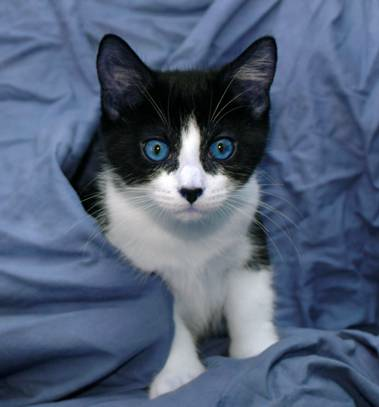

In [ ]:
# loading random cat image

import cv2
cat = '/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/train/cats/cat.1002.jpg'
image = cv2.imread(cat)
image

# **Building Model**

In [ ]:
# Set path to the dataset
base_dir = '/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/train'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
 # Using 20% of data for validation
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),  # Resizing images to 150x150
    batch_size=20,
    class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
    subset='training')  # Set as training data

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation',
    shuffle=False  # Disable shuffling for validation data
)

Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


# **Getting Class Labels**

In [ ]:
# Accessing class labels for the training data
train_class_labels = train_generator.class_indices
print("Training class labels:", train_class_labels)

# Accessing class labels for the validation data
validation_class_labels = validation_generator.class_indices
print("Validation class labels:", validation_class_labels)

Training class labels: {'cats': 0, 'dogs': 1}
Validation class labels: {'cats': 0, 'dogs': 1}


# **Basic CNN Model**

In [ ]:
model = models.Sequential([
    # layer 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),

    # layer 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # laer 3
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    # layer 4
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),


    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# Train the model

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


800/800 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.5605 - loss: 0.6750 - val_accuracy: 0.7145 - val_loss: 0.5744
Epoch 2/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.7329 - loss: 0.5405 - val_accuracy: 0.7853 - val_loss: 0.4643
Epoch 3/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 38s 44ms/step - accuracy: 0.7900 - loss: 0.4461 - val_accuracy: 0.8085 - val_loss: 0.4183
Epoch 4/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 0.8306 - loss: 0.3764 - val_accuracy: 0.8120 - val_loss: 0.4146
Epoch 5/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.8699 - loss: 0.3031 - val_accuracy: 0.8395 - val_loss: 0.3623
Epoch 6/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.8990 - loss: 0.2377 - val_accuracy: 0.8610 - val_loss: 0.3426
Epoch 7/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 38s 47ms/step - accuracy: 0.9310 - loss: 0.1701 - val_accuracy: 0.8512 - val_loss: 0.4027
Epoch 8/20
800/800 ━━━━━━━━━━━━━━━━━━━━ 37s 42ms/step - accuracy: 0.9509 - loss: 0.1255 - val_accurac

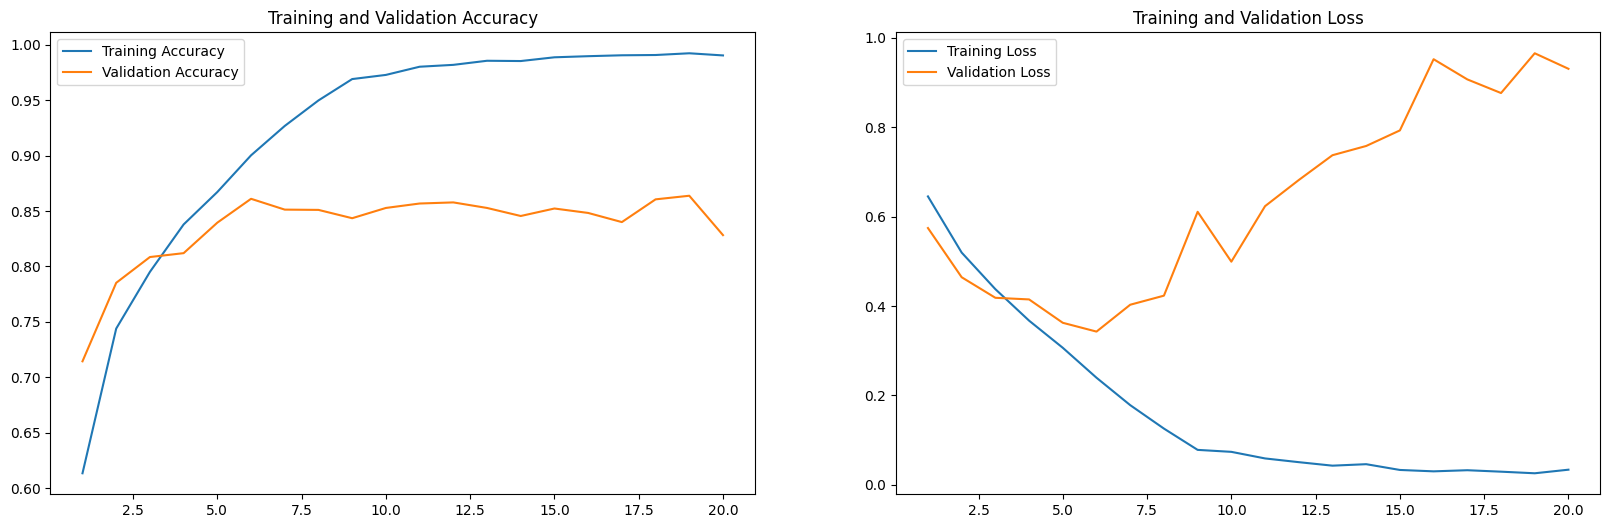

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(1, len(acc)+1)

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')
plt.show()

# **Model Evluation**

In [ ]:
# Define the test data generator
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for test data

test_dir = '/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/test'  # Path to your test directory

# Create the test generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),  # Should match the input size of your network
    batch_size=20,
    class_mode='binary',  # We do not need the labels here
    shuffle=False)  # Do not shuffle to maintain the order of files

Found 5000 images belonging to 2 classes.


In [ ]:
# Evaluating the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

  5/250 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.8440 - loss: 0.4195

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.8627 - loss: 0.6229
Test Loss: 0.9144949316978455
Test Accuracy: 0.8285999894142151


In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the results
print(f"Test accuracy: {test_accuracy*100:.2f}%")
print(f"Test loss: {test_loss:.2f}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.8627 - loss: 0.6229
Test accuracy: 82.86%
Test loss: 0.91


# **Plotting confusion Matrix**

In [ ]:
probabilities = model.predict(test_generator)
probabilities

250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step


array([[2.2810877e-10],
       [3.8516042e-03],
       [4.7929656e-09],
       ...,
       [4.8488268e-01],
       [8.4142083e-01],
       [1.4245454e-05]], dtype=float32)

In [ ]:
# Getting predicted classes

predicted_classes = np.where(probabilities > 0.5, 1, 0)
predicted_classes

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [ ]:
# Getting actual classes

true_classes = test_generator.classes

In [ ]:
class_labels = list(test_generator.class_indices.keys())
class_labels

['cats', 'dogs']

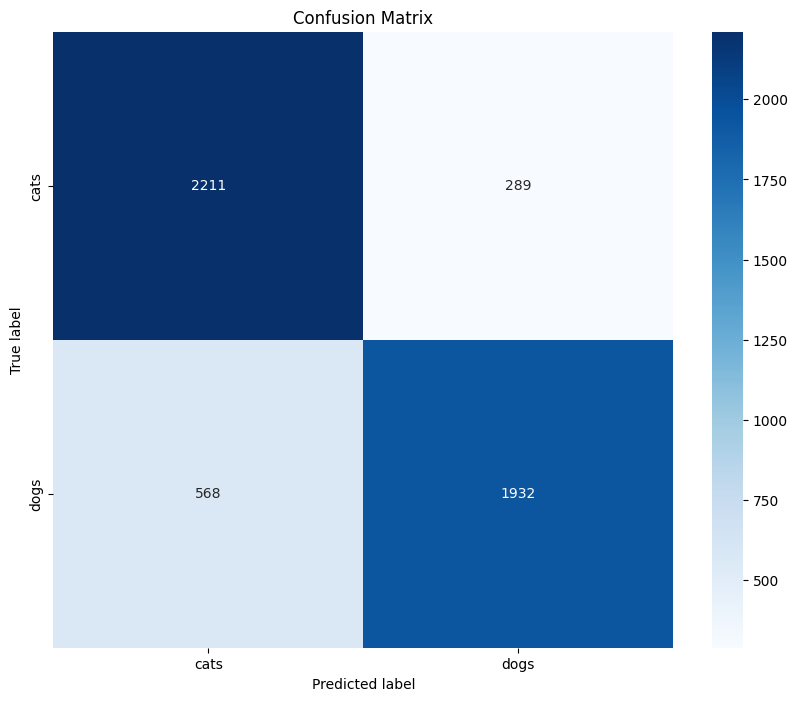

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# **Single Image Prediction**

In [ ]:
# Load and preprocess the image
img_path = '/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/test/cats/cat.10001.jpg'

In [ ]:
# Load and preprocess the image
img_path = '/root/.cache/kagglehub/datasets/salader/dogs-vs-cats/versions/1/test/dogs/dog.1176.jpg'

In [ ]:
def make_prediction(image_path):
    img = load_img(img_path, target_size=(150, 150))  # Resizing the image
    img_array = img_to_array(img)  # Converting to array
    print(img_array.shape)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    print(img_array.shape)
    img_array /= 255.  # Rescale the image similarly as we did for the training data

    prediction = model.predict(img_array)
    print("Prediction:", prediction)
    return prediction

In [ ]:
pred = make_prediction(img_path)

(150, 150, 3)
(1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Prediction: [[0.99999976]]


In [ ]:
img = load_img(img_path, target_size=(150, 150))

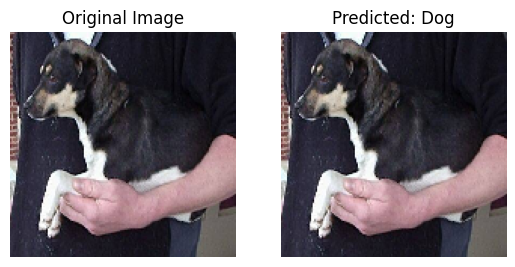

In [ ]:
# Original image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Prediction
plt.subplot(1, 2, 2)
if pred[0,0] > 0.5:
  plt.title('Predicted: Dog')
else:
  plt.title('Predicted: Cat')
plt.imshow(img)  # Show the same image as prediction
plt.axis('off')

plt.show()